In [152]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize


## (a)

In [153]:
def f(x):
#     unnormalized f(x)
    y=np.exp(-x**4+2*x**2-1)
    return y

In [154]:
def y(x):
#     y(x)=Z*f(x)/g_1(x)
    y=np.sqrt(2*np.pi)*np.exp(-x**4+2.5*x**2-1)
    return y

In [155]:
s = np.random.normal(0, 1, 1000000).astype('float64')
Z=y(s)
print('Z=',np.mean(Z))
Z=np.mean(Z)

Z= 1.9732924351729748


In [156]:
print('f(2.7)=',f(2.7))

f(2.7)= 6.569460240146905e-18


In [157]:
# set a=2.7
X=np.linspace(-2.7,2.7,5401)
delta=X[1]-X[0]
F=f(X)
f1=F[:-1]
f2=F[1:]
height=(f1+f2)/2
print('Z given by Trapezoidal rule =',np.sum(height)*delta)
Z_exact=np.sum(height)*delta

Z given by Trapezoidal rule = 1.9737321500896063


## (b)

In [158]:
def fg(sig):
    #1/Z*(f(x)/g_sigma(x))
    x4=((4+1/sig**2)**2)/16
    x2=(4+1/sig**2)/4
    
    return (1/Z_exact)*np.sqrt(2*np.pi)*sig*np.exp(-x4+(2+1/(2*sig**2))*x2-1)

In [159]:
def gn(x,sig):
    #g_sigma(x)
    return np.sqrt(1/(2*np.pi*sig**2))*np.exp(-x**2/(2*sig**2))

In [160]:
# Find optimal sigma
print(optimize.minimize(fg, x0=1))

      fun: 2.203908279003001
 hess_inv: array([[0.23361405]])
      jac: array([2.98023224e-08])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([1.09868411])


In [161]:
print('c=',fg(1.09868411))

c= 2.2039082790030005


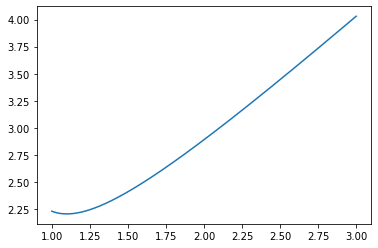

In [145]:
z=np.linspace(1.0,3.0,3000)
plt.plot(z,fg(z))


## (c)

In [166]:
sigma=1.0986843
c= 2.2039082790030005

In [167]:

N=10**6

s = np.random.uniform(0,1,N)
k=np.random.normal(0, sigma,N)
ratio=(f(k)/(Z_exact*c*gn(k,sigma)))
accept=k[s<=ratio]
reject=k[s>ratio]


In [168]:
print('ratio between total samples and accepted samples=',1000000/len(accept))

ratio between total samples and accepted samples= 2.2049646985151767


Text(0.5, 1.0, 'Histogram')

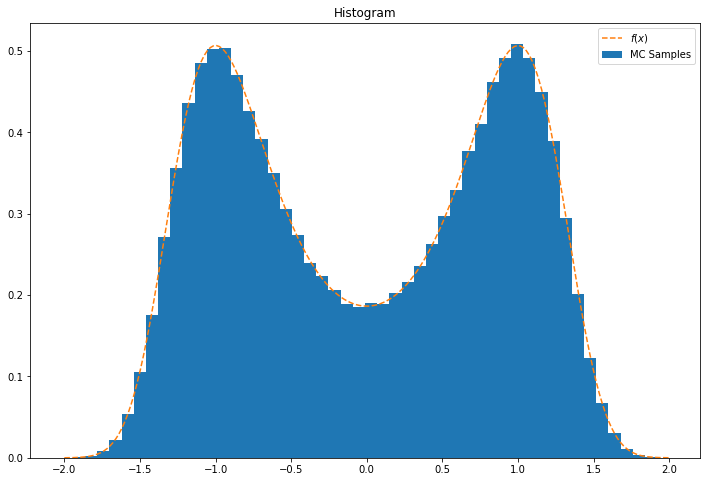

In [169]:

x=np.linspace(-2,2,200)
num_bins = 50

plt.figure(figsize=(12,8))
n, bins, patches = plt.hist(accept, num_bins, density=1,label='MC Samples')
plt.plot(x, f(x)/Z, '--',label=r"$f(x)$")
plt.legend()
plt.title('Histogram')

## (d)

In [171]:
x_abs=np.abs(accept)
Ex_abs=np.mean(x_abs)
print('E(|x|)=',Ex_abs)

E(|x|)= 0.8265223428639071
